# US Baby Names

Data set in 'da_practice/data/babynames/'

Posibilities:
- Visualize the proportion of babies given a particular name (your own, or anothername) over time
- Determine the relative rank of a name
- Determine the most popular names in each year or the names whose popularityhas advanced or declined the most
- Analyze trends in names: vowels, consonants, length, overall diversity, changes inspelling, first and last letters
- Analyze external sources of trends: biblical names, celebrities, demographics

In [17]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Exploring one file to see what to expect
path = "../data/babynames/yob1900.txt"
with open(path, 'r') as f:
    lines = f.readlines()

print(f"First 10 lines: \n{lines[:10]}")

First 10 lines: 
['Mary,F,16710\n', 'Helen,F,6343\n', 'Anna,F,6115\n', 'Margaret,F,5305\n', 'Ruth,F,4765\n', 'Elizabeth,F,4097\n', 'Florence,F,3920\n', 'Ethel,F,3896\n', 'Marie,F,3856\n', 'Lillian,F,3414\n']


The file is comma separated, we can use `pandas.read_csv` to work with it.

In [19]:
import pandas as pd 

# Reading first year 1880
path = "../data/babynames/yob1880.txt"

# We have to specified the header
names1880 = pd.read_csv(path, names=["name", "sex", "births"])

print(names1880[:10])

        name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746
5   Margaret   F    1578
6        Ida   F    1472
7      Alice   F    1414
8     Bertha   F    1320
9      Sarah   F    1288


Creating a DataFrame with every available year, concatenating the files.

In [20]:
import pandas as pd 
import numpy as np 

pieces = []
for year in np.arange(1880, 2011):
    path = f"../data/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    frame["year"] = year # New column for the year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
# We ignore index returned by 'read_csv' because we are not interested in it
# We wan other index with all the cases

names = pd.DataFrame(names)
names["sex"] = names["sex"].astype("category")
names["births"] = names["births"].astype("Int64")

print(f"Names dataset: \n{names.sample(10)}")


Names dataset: 
             name sex  births  year
491658      Reuel   M      10  1952
233102    Lennard   M       6  1925
987470    Natanya   F      11  1986
1165969  Brittney   M       9  1993
1258459  Shavonte   F       9  1997
1081371     Lenea   F       6  1990
1287016    Azlynn   F       7  1998
978874     Joanne   M       7  1985
783536    Kareena   F       5  1975
572137       Loye   M       5  1959


Total births per year: 
year  sex
2007  F      1916888
      M      2069242
2008  F      1883645
      M      2032310
2009  F      1827643
      M      1973359
2010  F      1759010
      M      1898382
Name: births, dtype: Int64


<Axes: title={'center': 'Total births per year'}, xlabel='year'>

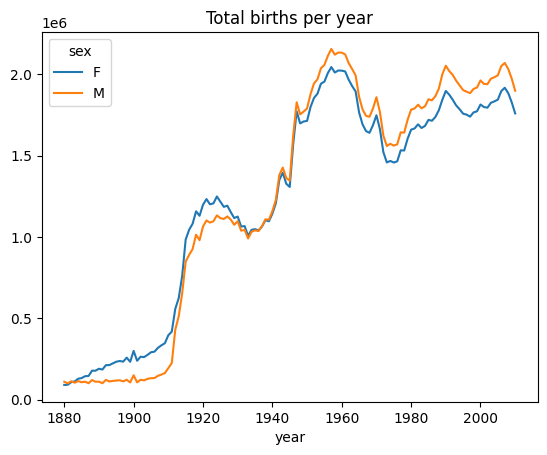

In [21]:
## Exploring 
total_births = names.groupby(["year", "sex"])["births"].sum()

total_births_graph = names.pivot_table("births",
                                       index="year",
                                       columns="sex",
                                       aggfunc=sum)

print(f"Total births per year: \n{total_births.tail(8)}")

total_births_graph.plot(title="Total births per year")

Now we can add a proportion and percentage columnns.

In [22]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()

    return group

names = names.groupby(["year", "sex"]).apply(add_prop).reset_index(drop=True)
# We add '.reset_index(drop=True)' after .groupby().apply() to avoid errors
# because 'groupby()' create a new index column with the group

print(f"Sample of names: \n{names.sample(15)}")


Sample of names: 
             name sex  births  year      prop
1570210   Allyria   F       5  2007  0.000003
52490     Roberta   F     199  1900  0.000664
1160943      Jade   M     179  1993  0.000091
95112      Vassie   F      11  1911  0.000026
763030      Cyndy   F      10  1974  0.000007
237130      Helvi   F      10  1926  0.000008
286996   Maryanna   F      13  1931  0.000012
27825       Billy   M       6  1891  0.000059
168133      Dearl   M       7  1919  0.000007
106597    Eulalie   F      12  1913  0.000019
1521438      Hala   F      56  2006   0.00003
147328     Artice   M       7  1917  0.000008
1299080     Shady   M       9  1998  0.000005
1525641   Deyonna   F      17  2006  0.000009
77479         Ara   F      27  1907  0.000085


In [23]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

grouped = names.groupby(["year", "sex"], axis=0)
top1000 = grouped.apply(get_top1000).reset_index(drop=True)

print(f"Top 15 names: \n{top1000.head(15)}")

Top 15 names: 
         name sex  births  year      prop
0        Mary   F    7065  1880  0.077643
1        Anna   F    2604  1880  0.028618
2        Emma   F    2003  1880  0.022013
3   Elizabeth   F    1939  1880  0.021309
4      Minnie   F    1746  1880  0.019188
5    Margaret   F    1578  1880  0.017342
6         Ida   F    1472  1880  0.016177
7       Alice   F    1414  1880   0.01554
8      Bertha   F    1320  1880  0.014507
9       Sarah   F    1288  1880  0.014155
10      Annie   F    1258  1880  0.013825
11      Clara   F    1226  1880  0.013474
12       Ella   F    1156  1880  0.012704
13   Florence   F    1063  1880  0.011682
14       Cora   F    1045  1880  0.011484


### Let's analize some naming trends:
